In [1]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
%matplotlib inline
import json

import gmaps 
from config import gkey
# Configure gmaps
# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [ ]:
#1. The mean duration of players in NBA for each school is in proportion to the total number of players in NBA for that school. 
#I am thinking to these findings on Gmap for each school.  
#Also I plot a scatter bubble chart, The bubble represents the mean duration of players in NBA for each school.



In [ ]:
# Working steps:
#1. Pull in player data to get their mean duration in NBA for each school. 
#2. Using the same dataset, I will group the data by school and get the total number of players for each school.
#3. Plot the total number of players vs the mean duration of players for each school in Gmap
#4. Plot the scatter plot and add a trend line for each school to see there are any trends.

In [2]:
player_dataCsv = 'player_data_new.csv'
player_data_DF = pd.read_csv(player_dataCsv)

player_data_DF['duration'] = player_data_DF['year_end'] - player_data_DF['year_start'] 
player_data_DF.head()

player_data_DF_clean = player_data_DF[['college','name', 'duration']]
player_data_DF_gp = player_data_DF_clean.groupby('college')
player_data_summary = player_data_DF_gp[['duration']].mean()
player_data_summary = player_data_summary[player_data_summary['duration']> 0].reset_index().sort_values('college')
player_data_summary.head()

,college,duration
0,Alabama State University,1.00
1,Albany State University,8.60
2,Alcorn State University,6.25
3,American International College,10.00
4,American University,14.00


In [3]:
College_numberOfPlayer = player_data_DF_clean.groupby('college')[['name']].count().reset_index()
College_numberOfPlayer.head()

,college,name
0,Acadia University,1
1,Alabama - Huntsville,1
2,Alabama A&M University,1
3,Alabama State University,2
4,Albany State University,5


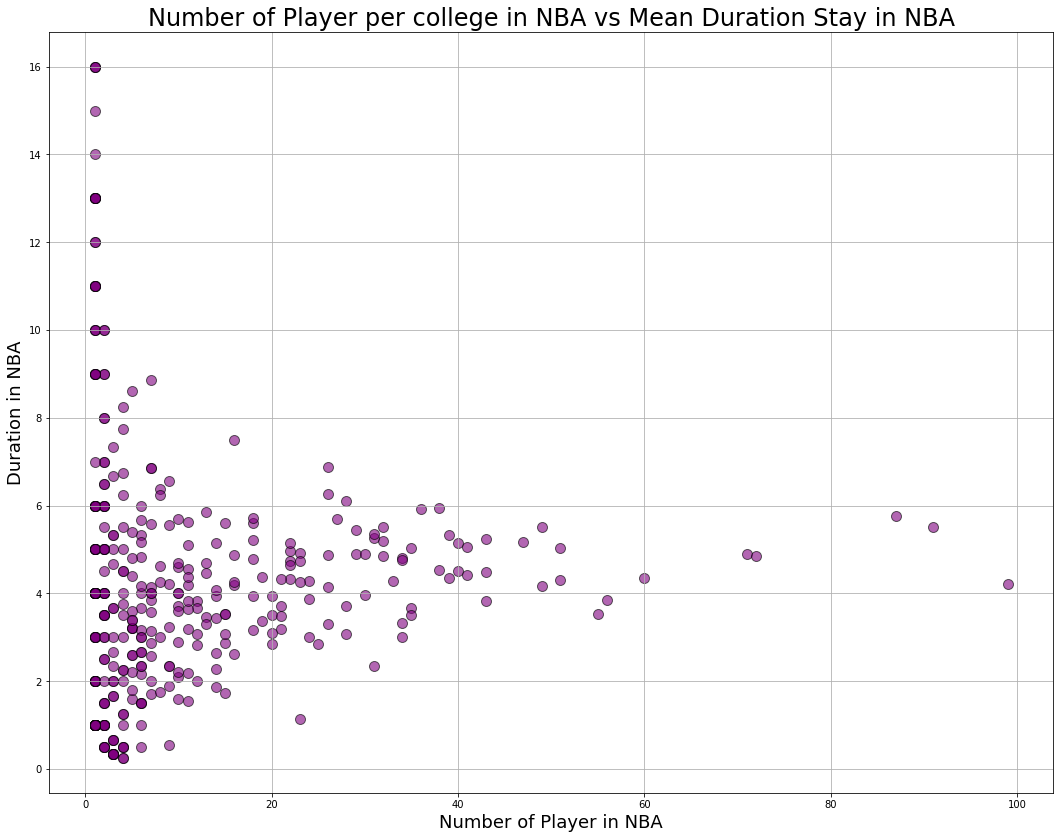

In [4]:
merge_player_college = pd.merge(player_data_summary, College_numberOfPlayer, how='inner',  on='college')

merge_player_college = merge_player_college.rename(columns={'name':'count of player'})
countOfPlayerlist = list(merge_player_college['count of player'])
durationList = list(merge_player_college['duration'])

#Plotting
plt.figure(figsize=(18,14))
plt.scatter(countOfPlayerlist, durationList, marker="o", s=100, facecolors="purple", edgecolors="black", alpha=0.60)
plt.xlabel('Number of Player in NBA',fontsize='18')

plt.ylabel('Duration in NBA', fontsize='18')
plt.title('Number of Player per college in NBA vs Mean Duration Stay in NBA', fontsize='24')
plt.grid()
plt.savefig("Player_count_vs_avg_stay_in_NBA.png")
plt.show()



In [5]:
# Need gkey to run this code

merge_player_college['lat'] = ""
merge_player_college['lng'] = ""

target_type = "university"

# set up a parameters dictionary
params3 = {
    "key": gkey,
    "type": target_type
    }



target_url= "https://maps.googleapis.com/maps/api/geocode/json"

for index, row in merge_player_college.iterrows():
    
    college=row['college']
    params3['address'] = college
        
    geo_data = requests.get(target_url, params= params3).json()
    merge_player_college.loc[index, 'lat'] = geo_data["results"][0]["geometry"]["location"]["lat"]
    merge_player_college.loc[index, 'lng'] = geo_data["results"][0]["geometry"]["location"]["lng"]
    
merge_player_college.head()



,college,duration,count of player,lat,lng
0,Alabama State University,1.00,2,32.3637,-86.2941
1,Albany State University,8.60,5,31.569,-84.1404
2,Alcorn State University,6.25,4,31.8742,-91.1373
3,American International College,10.00,1,42.1129,-72.5571
4,American University,14.00,1,38.9375,-77.0888


In [6]:
# Store latitude and longitude in locations
locations = merge_player_college[['lat','lng']]

duration = merge_player_college['duration'].astype(float)



# Plot Heatmap

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights = duration, dissipating=False, max_intensity=8, point_radius=.75)
fig.add_layer(heat_layer)


fig



Figure(layout=FigureLayout(height='420px'))

In [7]:
# Store latitude and longitude in locations
locations = merge_player_college[['lat','lng']]


count = merge_player_college['count of player'].astype(float)

# Plot Heatmap


fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights = count, dissipating=False, max_intensity=15, point_radius=0.75)
fig.add_layer(heat_layer)

fig



Figure(layout=FigureLayout(height='420px'))

In [33]:
Seasons_Stats_file = 'Seasons_Stats.csv'
Seasons_Stats_DF = pd.read_csv(Seasons_Stats_file)
Seasons_Stats_DF.head()



,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


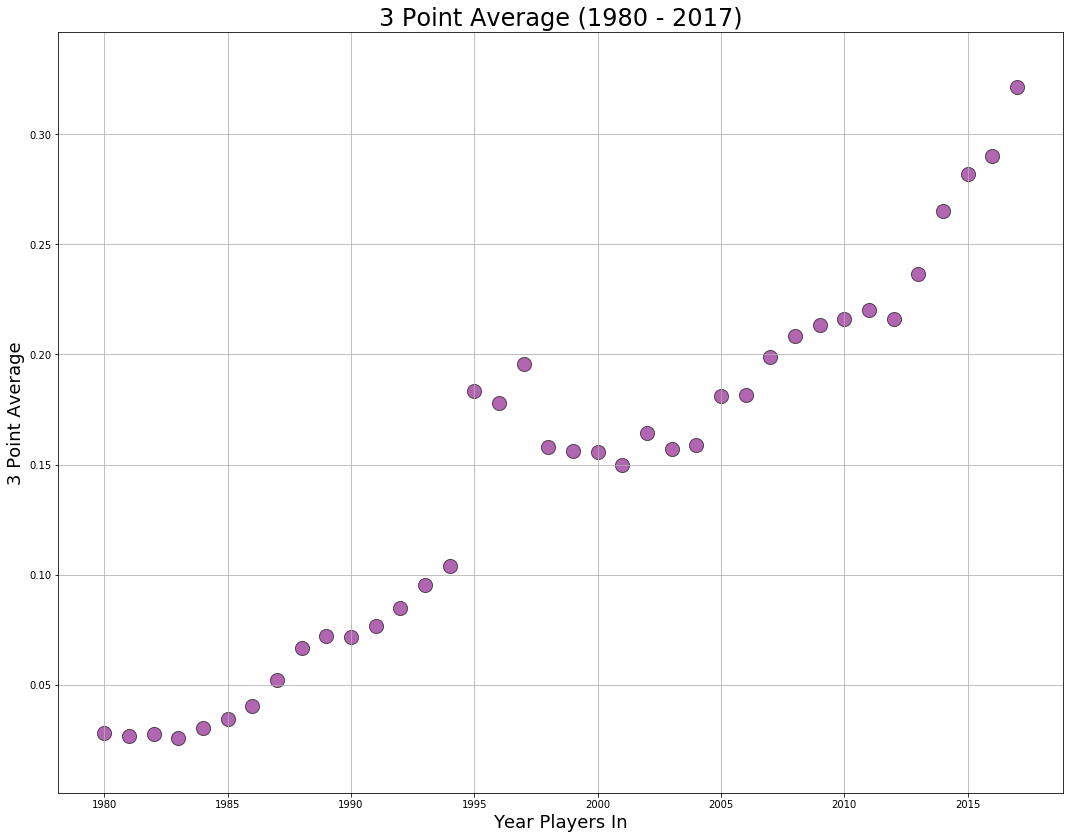

In [39]:
#setting up the data list for plotting

PAr = Seasons_Stats_DF.groupby(['Year'])['3PAr'].mean().dropna().reset_index()['3PAr']
list_3PAr = list(PAr)
Year = Seasons_Stats_DF.groupby(['Year'])['3PAr'].mean().dropna().reset_index()['Year']
listYear = list(Year)

#Plotting
plt.figure(figsize=(18,14))
plt.scatter(listYear, list_3PAr, marker="o", s=200, facecolors="purple", edgecolors="black", alpha=0.60)
plt.xlabel('Year Players In', fontsize=18)
plt.ylabel('3 Point Average', fontsize=18)

plt.title('3 Point Average (1980 - 2017)', fontsize=24)
plt.grid()
plt.savefig('ThreePointAv_overYear1980_2017.png')
plt.show()

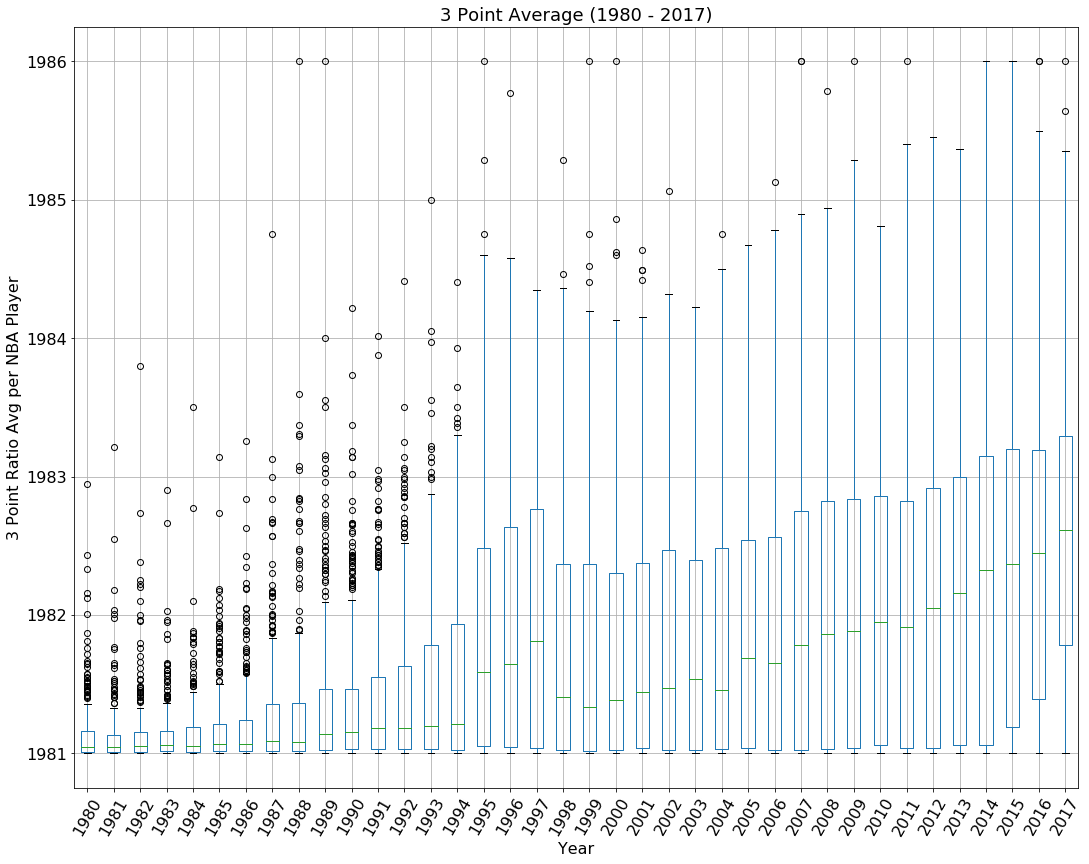

In [64]:

Year_3PAvr = Seasons_Stats_DF[Seasons_Stats_DF['Year'] >= 1980][['Year','Player','3PAr']]
df_Year_3PAvr = Year_3PAvr.groupby(['Player', 'Year'])[['3PAr']].mean()
new_df = df_Year_3PAvr.unstack()

# remove the '3PAr' level
new_df= new_df['3PAr']
labelobj = list(new_df.columns)
listlabel = [np.int(x) for x in labelobj]
x_axis = np.arange(0,len(listlabel),1)
# rename all column name removing trailing 0
new_df.columns= listlabel 

fig, ax= plt.subplots(figsize=(18,14))

ax.set_xticklabels(labelobj ,rotation='vertical', fontsize=16)
#ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.set_yticklabels(new_df, fontsize=16)
ax.set_title('3 Point Average (1980 - 2017)',  fontsize=18)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('3 Point Ratio Avg per NBA Player', fontsize=16)
#top_10.plot(ax=ax)
#plt.figure()
#plt.xticks(x_axis, listlabel, rotation='vertical')
#plt.xticks( listlabel,labelobj, rotation='vertical')

bp = new_df.boxplot(rot=60, ax=ax)
plt.savefig('BoxPlot_ThreePointAv_overYear1980_2017.png')




In [ ]:

#setting up the data list for plotting

PAr = Seasons_Stats_DF.groupby(['Year'])['3PAr'].mean().dropna().reset_index()['3PAr']
list_3PAr = list(PAr)
Year = Seasons_Stats_DF.groupby(['Year'])['3PAr'].mean().dropna().reset_index()['Year']
listYear = list(Year)

#Plotting
plt.figure(figsize=(18,14))
plt.scatter(listYear, list_3PAr, marker="o", facecolors="purple", edgecolors="black", alpha=0.60)
plt.xlabel('Year Players In', fontsize = 16)
plt.ylabel('3 Point Average', fontsize = 16)

plt.title('Year vs 3 Point Average ', fontsize= 16)
plt.grid()
